<a href="https://colab.research.google.com/github/PranavTadimeti/CVIT_Workshop/blob/master/day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(137, 137, 4)


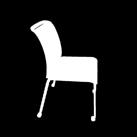

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

i1 = cv2.imread('/content/gamma1.jpg')
i2 = cv2.imread('/content/chair.png',cv2.IMREAD_UNCHANGED)

print(i2.shape)

cv2_imshow(i2[:,:,3])


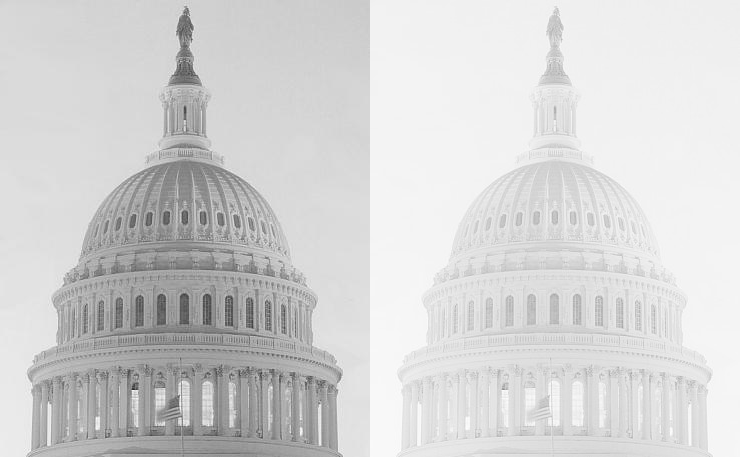

In [93]:
# gamma transformation

im = cv2.imread('/content/gamma1.jpg',cv2.IMREAD_UNCHANGED)
i1 = cv2.imread('/content/gamma1.jpg',cv2.IMREAD_UNCHANGED)

table = np.array([((i / 255.0) ** 0.3) * 255 for i in np.arange(0, 256)]).astype("uint8")

i3 = i1

cv2.LUT(i1,table,i3)

cv2_imshow(np.hstack([im,i1]))

(457, 370)


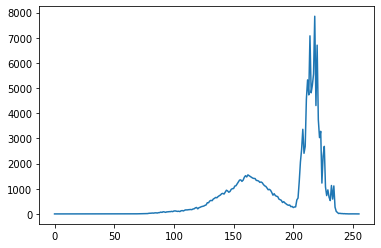

In [70]:
# histogram for grayscaled image

import matplotlib.pyplot as plt

i1 = cv2.imread('/content/gamma1.jpg',cv2.IMREAD_UNCHANGED)

print(i1.shape)

freq = np.zeros((256,1))

for i in i1:
  for j in i:
    freq[j]+=1

arr = np.zeros((256,1))

for i in range(256):
  arr[i] = i

plt.plot(arr,freq)


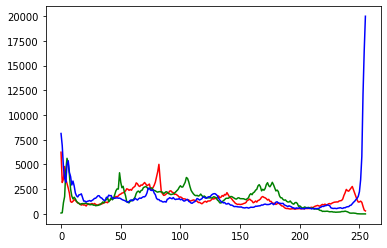

In [101]:
# histogram for rgb image

freq = np.zeros((3,256))

im = cv2.imread('/content/lotus.jpg',cv2.IMREAD_UNCHANGED)

for i in range(3):
  for j in im[:,:,i]:
    for k in j:
      freq[i,k] += 1

arr = np.zeros((256,1))

for i in range(256):
  arr[i] = i

cols = ['red','green','blue']
for i in range(len(freq)):
  plt.plot(arr,freq[i],color=cols[i])

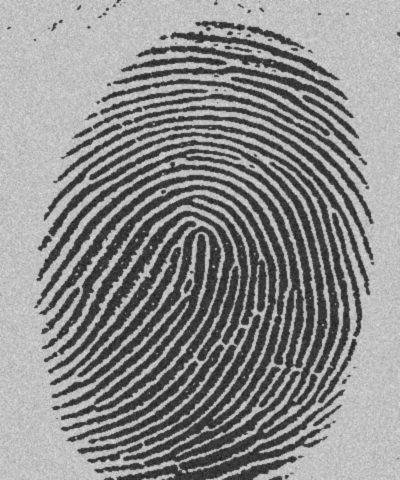

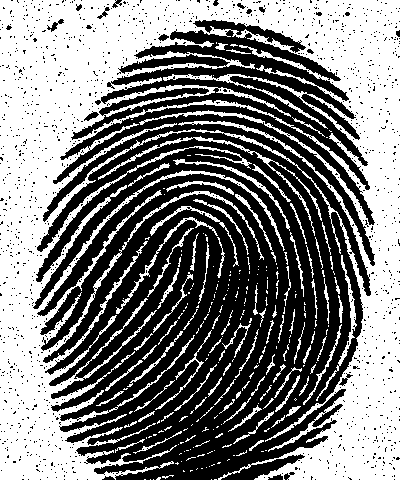

In [55]:
# binary thresholding

i4 = cv2.imread('/content/FingerPrint.jpg',cv2.IMREAD_UNCHANGED)
cv2_imshow(i4)

i5 = np.double(i4)

th = 180

for i in i5:
  for j in range(len(i)):
    if(i[j] > th):
      i[j] = 255
    else:
      i[j] = 0

i5 = np.uint8(i5)
cv2_imshow(i5)



(423, 419)


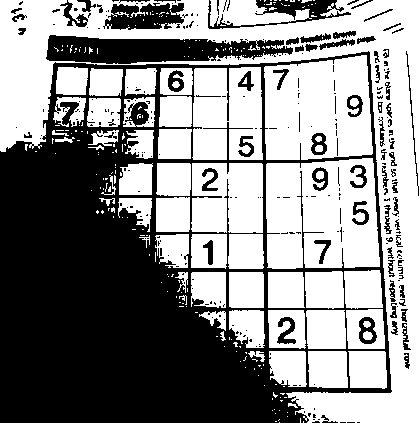

In [62]:
# binary thresholding on gradient image

i4 = cv2.imread('/content/sudoku.jpeg',cv2.IMREAD_GRAYSCALE)

print(i4.shape)
i5 = np.double(i4)

th = 100

for i in i5:
  for j in range(len(i)):
    if(i[j] > th):
      i[j] = 255
    else:
      i[j] = 0

i5 = np.uint8(i5)
cv2_imshow(i5)

In [0]:
# filter function

im = cv2.imread('/content/gamma1.jpg',cv2.IMREAD_UNCHANGED)

def filt(I,H):
  output = []

  for u in range(len(I)):
    temp1 = []

    for v in range(len(u)):

      temp2=0
      for i in range(len(H)):
        for j in range(len(i)):
          temp += I[u+i-1][v+j-1]*H[i][j]
      
        temp1.append(temp2)
    output.append(temp1)

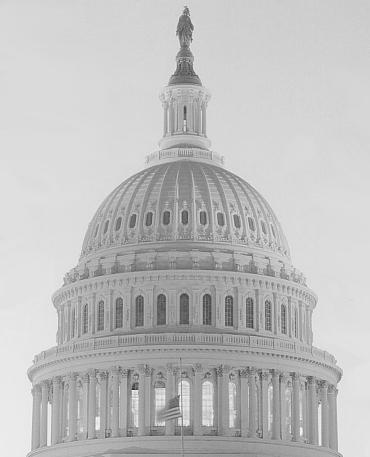

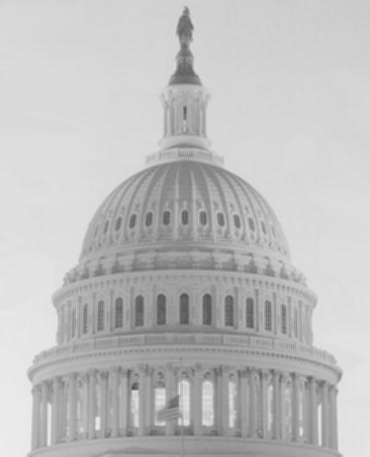

In [56]:
#filter2D

im = cv2.imread('/content/gamma1.jpg',cv2.IMREAD_UNCHANGED)
cv2_imshow(im)
H = np.ones((3,3))
H = H/9.0

im = cv2.filter2D(im,-1,H)
cv2_imshow(im)

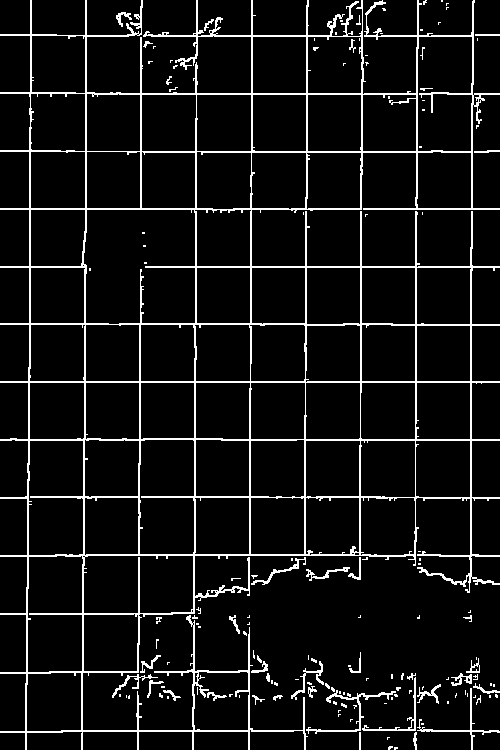

In [85]:
im = cv2.imread('/content/window.jpeg',cv2.IMREAD_GRAYSCALE)

i5 = np.double(im)

def threshold(i5):

  th = 150

  for i in i5:
    for j in range(len(i)):
      if(i[j] > th):
        i[j] = 255
      else:
        i[j] = 0

  i5 = np.uint8(i5)
  return i5

im = threshold(i5)

hor =  np.asarray([[1,2,1],[0,0,0],[-1,-2,-1]])
vert = np.transpose(hor)
im_h = cv2.filter2D(im,-1,hor)
im_v = cv2.filter2D(im,-1,vert)

overlap = np.uint8(np.asarray(im_h) + np.asarray(im_v))

cv2_imshow(overlap)


